<a href="https://colab.research.google.com/github/LeTam0101/TRI-TUE-NHAN-TAO/blob/main/Tr%C3%AD_Tu%E1%BB%87_Nh%C3%A2n_T%E1%BA%A1o_27_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 13.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=226ea9bf49684e63fc68a0e48d7f815c3ef208b87207c4bfda848cf12f40fa19
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


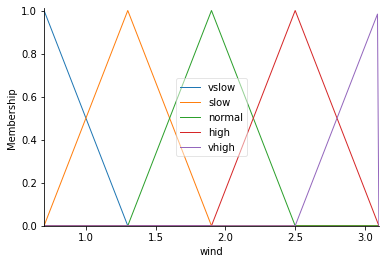

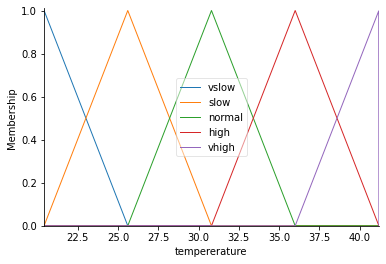

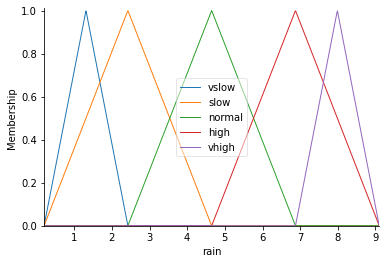

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
wind = ctrl.Antecedent(np.arange(0.7 , 3.1 , 0.01),'wind')
tempererature = ctrl.Antecedent(np.arange(20.4 , 41.2 , 0.01),'tempererature')
rain = ctrl.Consequent(np.arange(0.2 , 9.1 , 0.01),'rain') 
wind['vslow'] = fuzz.trimf(wind.universe,[0.7 , 0.7 , 1.3])
wind['slow'] = fuzz.trimf(wind.universe,[0.7 , 1.3 , 1.9])
wind['normal'] = fuzz.trimf(wind.universe,[1.3 , 1.9 , 2.5])
wind['high'] = fuzz.trimf(wind.universe,[1.9 , 2.5 , 3.1])
wind['vhigh'] = fuzz.trimf(wind.universe,[2.5 , 3.1 , 3.1])

tempererature['vslow'] = fuzz.trimf(tempererature.universe,[20.4 , 20.4 , 25.6])
tempererature['slow'] = fuzz.trimf(tempererature.universe,[20.4 , 25.6 , 30.8])
tempererature['normal'] = fuzz.trimf(tempererature.universe,[25.6 , 30.8 , 36])
tempererature['high'] = fuzz.trimf(tempererature.universe,[30.8 , 36 , 41.2])
tempererature['vhigh'] = fuzz.trimf(tempererature.universe,[36 , 41.2 , 41.2])

rain['vslow'] = fuzz.trimf(rain.universe,[0.2 , 1.3125 , 2.425])
rain['slow'] = fuzz.trimf(rain.universe,[0.2 , 2.425 , 4.65])
rain['normal'] = fuzz.trimf(rain.universe,[2.425 , 4.65 , 6.875])
rain['high'] = fuzz.trimf(rain.universe,[4.65 , 6.875 , 9.1])
rain['vhigh'] = fuzz.trimf(rain.universe,[6.875 , 7.9875 , 9.1])

wind.view()
tempererature.view()
rain.view()

2.408918503497113


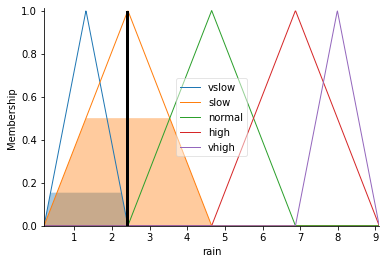

In [ ]:
rule1 = ctrl.Rule(tempererature["vslow"] & wind["vslow"], rain["vslow"])
rule2 = ctrl.Rule(tempererature["slow"] & wind["vslow"], rain["vslow"])
rule3 = ctrl.Rule(tempererature["vslow"] & wind["slow"], rain["vslow"])
rule4 = ctrl.Rule(tempererature["slow"] & wind["slow"], rain["vslow"])

rule5 = ctrl.Rule(tempererature["normal"] & wind["vslow"], rain["slow"])
rule6 = ctrl.Rule(tempererature["high"] & wind["vslow"], rain["slow"])
rule7 = ctrl.Rule(tempererature["normal"] & wind["slow"], rain["slow"])
rule8 = ctrl.Rule(tempererature["vslow"] & wind["normal"], rain["slow"])
rule9 = ctrl.Rule(tempererature["slow"] & wind["normal"], rain["slow"])
rule10 = ctrl.Rule(tempererature["vslow"] & wind["high"], rain["slow"])

rule11 = ctrl.Rule(tempererature["vhigh"] & wind["vslow"], rain["normal"])
rule12 = ctrl.Rule(tempererature["high"] & wind["slow"], rain["normal"])
rule13 = ctrl.Rule(tempererature["normal"] & wind["normal"], rain["normal"])
rule14 = ctrl.Rule(tempererature["slow"] & wind["high"], rain["normal"])
rule15 = ctrl.Rule(tempererature["vslow"] & wind["vhigh"], rain["normal"])

rule16 = ctrl.Rule(tempererature["vhigh"] & wind["slow"], rain["high"])
rule17 = ctrl.Rule(tempererature["high"] & wind["normal"], rain["high"])
rule18 = ctrl.Rule(tempererature["vhigh"] & wind["normal"], rain["high"])
rule19 = ctrl.Rule(tempererature["normal"] & wind["high"], rain["high"])
rule20 = ctrl.Rule(tempererature["slow"] & wind["vhigh"], rain["high"])
rule21 = ctrl.Rule(tempererature["normal"] & wind["vhigh"], rain["high"])

rule22 = ctrl.Rule(tempererature["high"] & wind["high"], rain["vhigh"])
rule23 = ctrl.Rule(tempererature["vhigh"] & wind["high"], rain["vhigh"])
rule24 = ctrl.Rule(tempererature["high"] & wind["vhigh"], rain["vhigh"])
rule25 = ctrl.Rule(tempererature["vhigh"] & wind["vhigh"], rain["vhigh"])

raining_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
raining = ctrl.ControlSystemSimulation(raining_ctrl)
raining.input['wind'] = 1
raining.input['tempererature'] = 30
raining.compute()
print(raining.output['rain'])
rain.view(sim=raining)

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
height= ctrl.Antecedent(np.arange(1.4 , 1.8 , 0.01),'height')
weight = ctrl.Antecedent(np.arange(40 , 80 , 0.01),'weight')
 
height['vslow'] = fuzz.trimf(height.universe,[0.7 , 0.7 , 1.3])
height['slow'] = fuzz.trimf(height.universe,[0.7 , 1.3 , 1.9])
height['normal'] = fuzz.trimf(height.universe,[1.3 , 1.9 , 2.5])
height['high'] = fuzz.trimf(height.universe,[1.9 , 2.5 , 3.1])
height['vhigh'] = fuzz.trimf(height.universe,[2.5 , 3.1 , 3.1])

weight['vslow'] = fuzz.trimf(weight.universe,[20.4 , 20.4 , 25.6])
weight['slow'] = fuzz.trimf(weight.universe,[20.4 , 25.6 , 30.8])
weight['normal'] = fuzz.trimf(weight.universe,[25.6 , 30.8 , 36])
weight['high'] = fuzz.trimf(weight.universe,[30.8 , 36 , 41.2])
weight['vhigh'] = fuzz.trimf(weight.universe,[36 , 41.2 , 41.2])

rain['vslow'] = fuzz.trimf(rain.universe,[0.2 , 1.3125 , 2.425])
rain['slow'] = fuzz.trimf(rain.universe,[0.2 , 2.425 , 4.65])
rain['normal'] = fuzz.trimf(rain.universe,[2.425 , 4.65 , 6.875])
rain['high'] = fuzz.trimf(rain.universe,[4.65 , 6.875 , 9.1])
rain['vhigh'] = fuzz.trimf(rain.universe,[6.875 , 7.9875 , 9.1])

wind.view()
tempererature.view()
rain.view()

In [ ]:
from tables.tests import test_suite

#REGRESSION: H
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Salary_Data.csv')
data.head()
data.shape

X = data.drop(['Salary'],axis = True)
y = data['Salary']


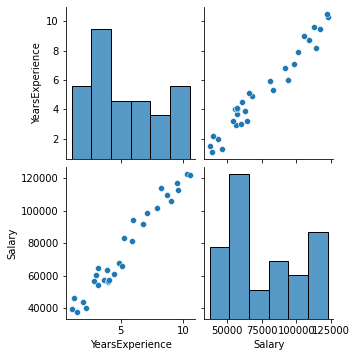

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
sns.pairplot(data)

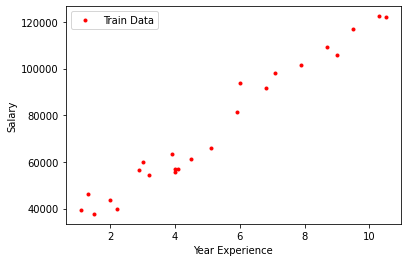

In [ ]:
plt.plot(X_train,y_train,'r.',label='Train Data')
plt.xlabel ('Year Experience')
plt.ylabel ('Salary')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test).round(1)
cal = pd.DataFrame(np.c_[y_test,y_pred], columns = ['Original Salary','Predicted Salary'])
print('Coeffcient',model.coef_)
print('Intercept',model.intercept_)
print('Acenracy',model.score(X_test, y_test))

Coeffcient [9423.81532303]
Intercept 25321.583011776813
Acenracy 0.9024461774180497


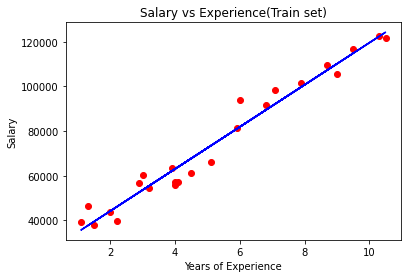

In [ ]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience(Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()